In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [ ]:
data=pd.read_csv("/content/Data-Test-technique-PFE-8.csv")


# 1- Data comprehension

In [ ]:
data.shape

(999, 8)

- on a 999 lignes et 8 colonnes:
  998 instances et 8 attributs

In [ ]:
data.head()

id_mutation  date_mutation  ...  distance_mer      prix
0  2014-871332           2014  ...   4766.960122  275000.0
1  2014-871334           2014  ...   4757.610807  370000.0
2  2014-871343           2014  ...   4763.261762  302500.0
3  2014-871344           2014  ...   4753.525529  210000.0
4  2014-871347           2014  ...   4767.263751  280000.0

[5 rows x 8 columns]

In [ ]:
data.tail()

id_mutation  date_mutation  ...  distance_mer      prix
994  2014-877801           2014  ...   6456.750258  493917.7
995  2014-877805           2014  ...   6490.890636  185000.0
996  2014-877806           2014  ...   6493.078460  225000.0
997  2014-877809           2014  ...   6493.745487  140000.0
998  2014-877816           2014  ...   6454.895452  120000.0

[5 rows x 8 columns]

- les colonnes "id_mutation" et "date_mutation" n'ajoute aucune information. Ils ne sont pas nécessaires, on doit les supprimer

In [ ]:
df=data.drop(['id_mutation', 'date_mutation'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   surface_reelle_bati        999 non-null    int64  
 1   nombre_pieces_principales  999 non-null    int64  
 2   longitude                  999 non-null    float64
 3   latitude                   999 non-null    float64
 4   distance_mer               999 non-null    float64
 5   prix                       999 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


prix est la variable à expliquer et les autres sont des variables explicatives

In [ ]:
df.describe()

surface_reelle_bati  ...          prix
count           999.000000  ...  9.990000e+02
mean             90.451451  ...  4.023374e+05
std              36.268557  ...  4.355703e+05
min              14.000000  ...  5.000000e+03
25%              69.000000  ...  2.155000e+05
50%              88.000000  ...  2.950000e+05
75%             107.000000  ...  4.250000e+05
max             300.000000  ...  5.880000e+06

[8 rows x 6 columns]

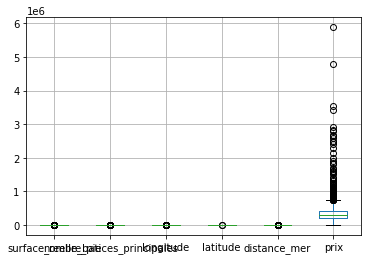

In [ ]:
df.boxplot();

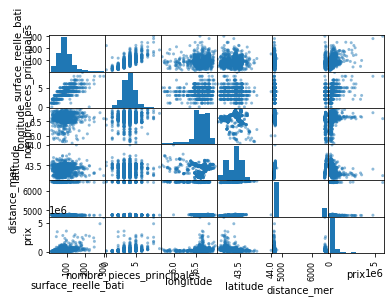

In [ ]:
pd.plotting.scatter_matrix(df);

# 2- Data preparation

## Vérification des valeurs nulles

In [ ]:
df.isnull().sum()

surface_reelle_bati          0
nombre_pieces_principales    0
longitude                    0
latitude                     0
distance_mer                 0
prix                         0
dtype: int64

=> pas de valeurs nulles

- La variable à prédire "prix" est quantitatif, tous les données sont labélisés. Alors nous sommes devant une probléme de régression linèaire multiple qui peut être résolue par un algorithme supervisé de machine learning de regression linéaire 

## 3- Data modeling

On a 6 variables explicatives pour le prix alors on doit choisir les plus pertinents, ceux sont les variables qui ont une forte relation linéaire avec la variable 'prix'.
A partir de matrice de coorélation on peut déduire les variables fortement / faiblement corélées aux prix tel que:
Les coefficients de corrélation se situent dans l’intervalle [-1,1].
- si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
- si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
- si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation.

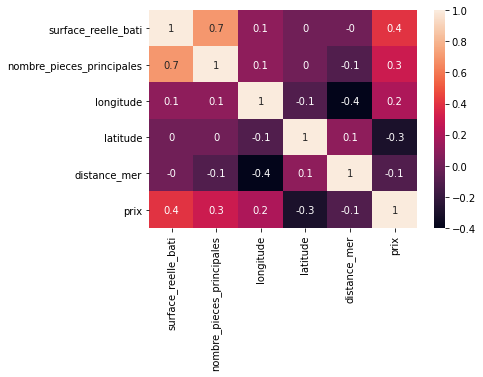

In [ ]:
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

Le prix a une forte corrélation avec la surface réelle batie et le nombre de pieces principales. Cependant il ne faut pas négliger les autres attributs comme distance mer… car leur corrélation sont pas proches de 0. Il faut savoir que lorsqu’on fait une régression linéaire on pose certaines hypothèses notamment la Non-colinéarité des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison linéaire des autres).


On utilise pour le modèle les variables choisies ci-dessus ensuite on divise notre jeu de données en 2 parties (80%, pour l’apprentissage et les 20% restant pour le test.

## Data standardisation

les données doivent être dans un même plage de valeurs pour qu'ils soient comparables. Avec le StandardScaler on transforme les données aux valeurs entre [-1,1]

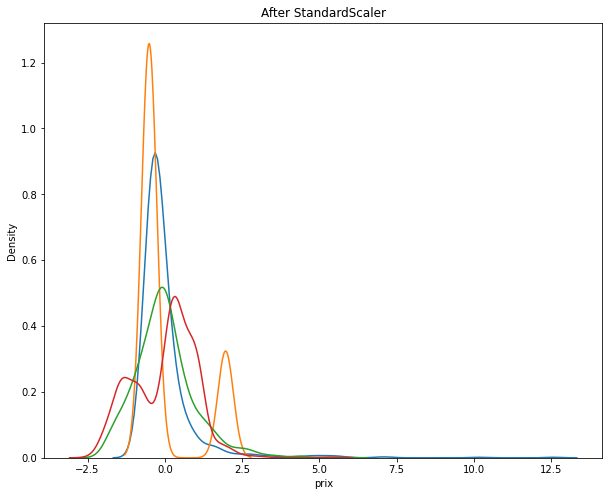

In [ ]:
from sklearn import preprocessing
mm_scaler = preprocessing.StandardScaler()
df_mm = mm_scaler.fit_transform(df)
col_names = list(df.columns)
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_mm['prix'], ax=ax1)
sns.kdeplot(df_mm['distance_mer'], ax=ax1)
sns.kdeplot(df_mm['surface_reelle_bati'], ax=ax1)
sns.kdeplot(df_mm['latitude'], ax=ax1)


In [ ]:

x=pd.DataFrame(np.c_[df['surface_reelle_bati'],df['distance_mer'],df['longitude'],df['nombre_pieces_principales'],df['latitude']], columns = ['surface_reelle_bati','disctance_mer','longitude','nombre_pieces_principales','latitude'])
Y = df['prix']

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(799, 5)
(200, 5)
(799,)
(200,)


In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model evaluation

In [ ]:

from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')

# model evaluation for testing set
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 353356.39673789585
le score R2 est 0.29570746145838356


La performance du modèle sur la base de test
--------------------------------------
Lerreur quadratique moyenne est 385239.6065922776
le score R2 est 0.37725846485024495


## Model deployement

In [ ]:
#pd.to_pickle(lmodellineaire,"/content/model.pickle ")
model=pd.read_pickle('/content/model.pickle ')

latitude=float(input("Entrer latitude: "))
longitude=float(input("Entrer longitude: "))
mer_dist=float(input("Entrer distance auprés de la mer: "))
surface=float(input("Entrer la surface batie: "))
pieces=float(input("Enter nombre de pièces: "))

result=model.predict([[latitude,longitude,mer_dist,surface,pieces]])
print(result)

Entrer latitude: 45.3
Entrer longitude: 23.6
Entrer distance auprés de la mer: 45.36
Entrer la surface batie: 123.3
Enter nombre de pièces: 5
[63715342.71483061]


## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [ ]:
X = df.drop("prix", axis = 1)
y = df['prix'].values
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 343610.739563


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.7,'learning_rate': 0.1,
                'max_depth': 10, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[20:10:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:10:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    547117.531250    40702.867409   550329.239583   80508.264001
1    506948.093750    39481.413730   520128.750000   80495.543470
2    470967.072917    37477.751954   494109.833333   79249.716021
3    437289.458333    35616.112873   470456.218750   81352.171001
4    406431.020833    33705.360432   451500.718750   80387.760812

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    322712.703125
Name: test-rmse-mean, dtype: float64


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[20:11:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


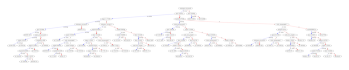

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [70, 70]
plt.show()

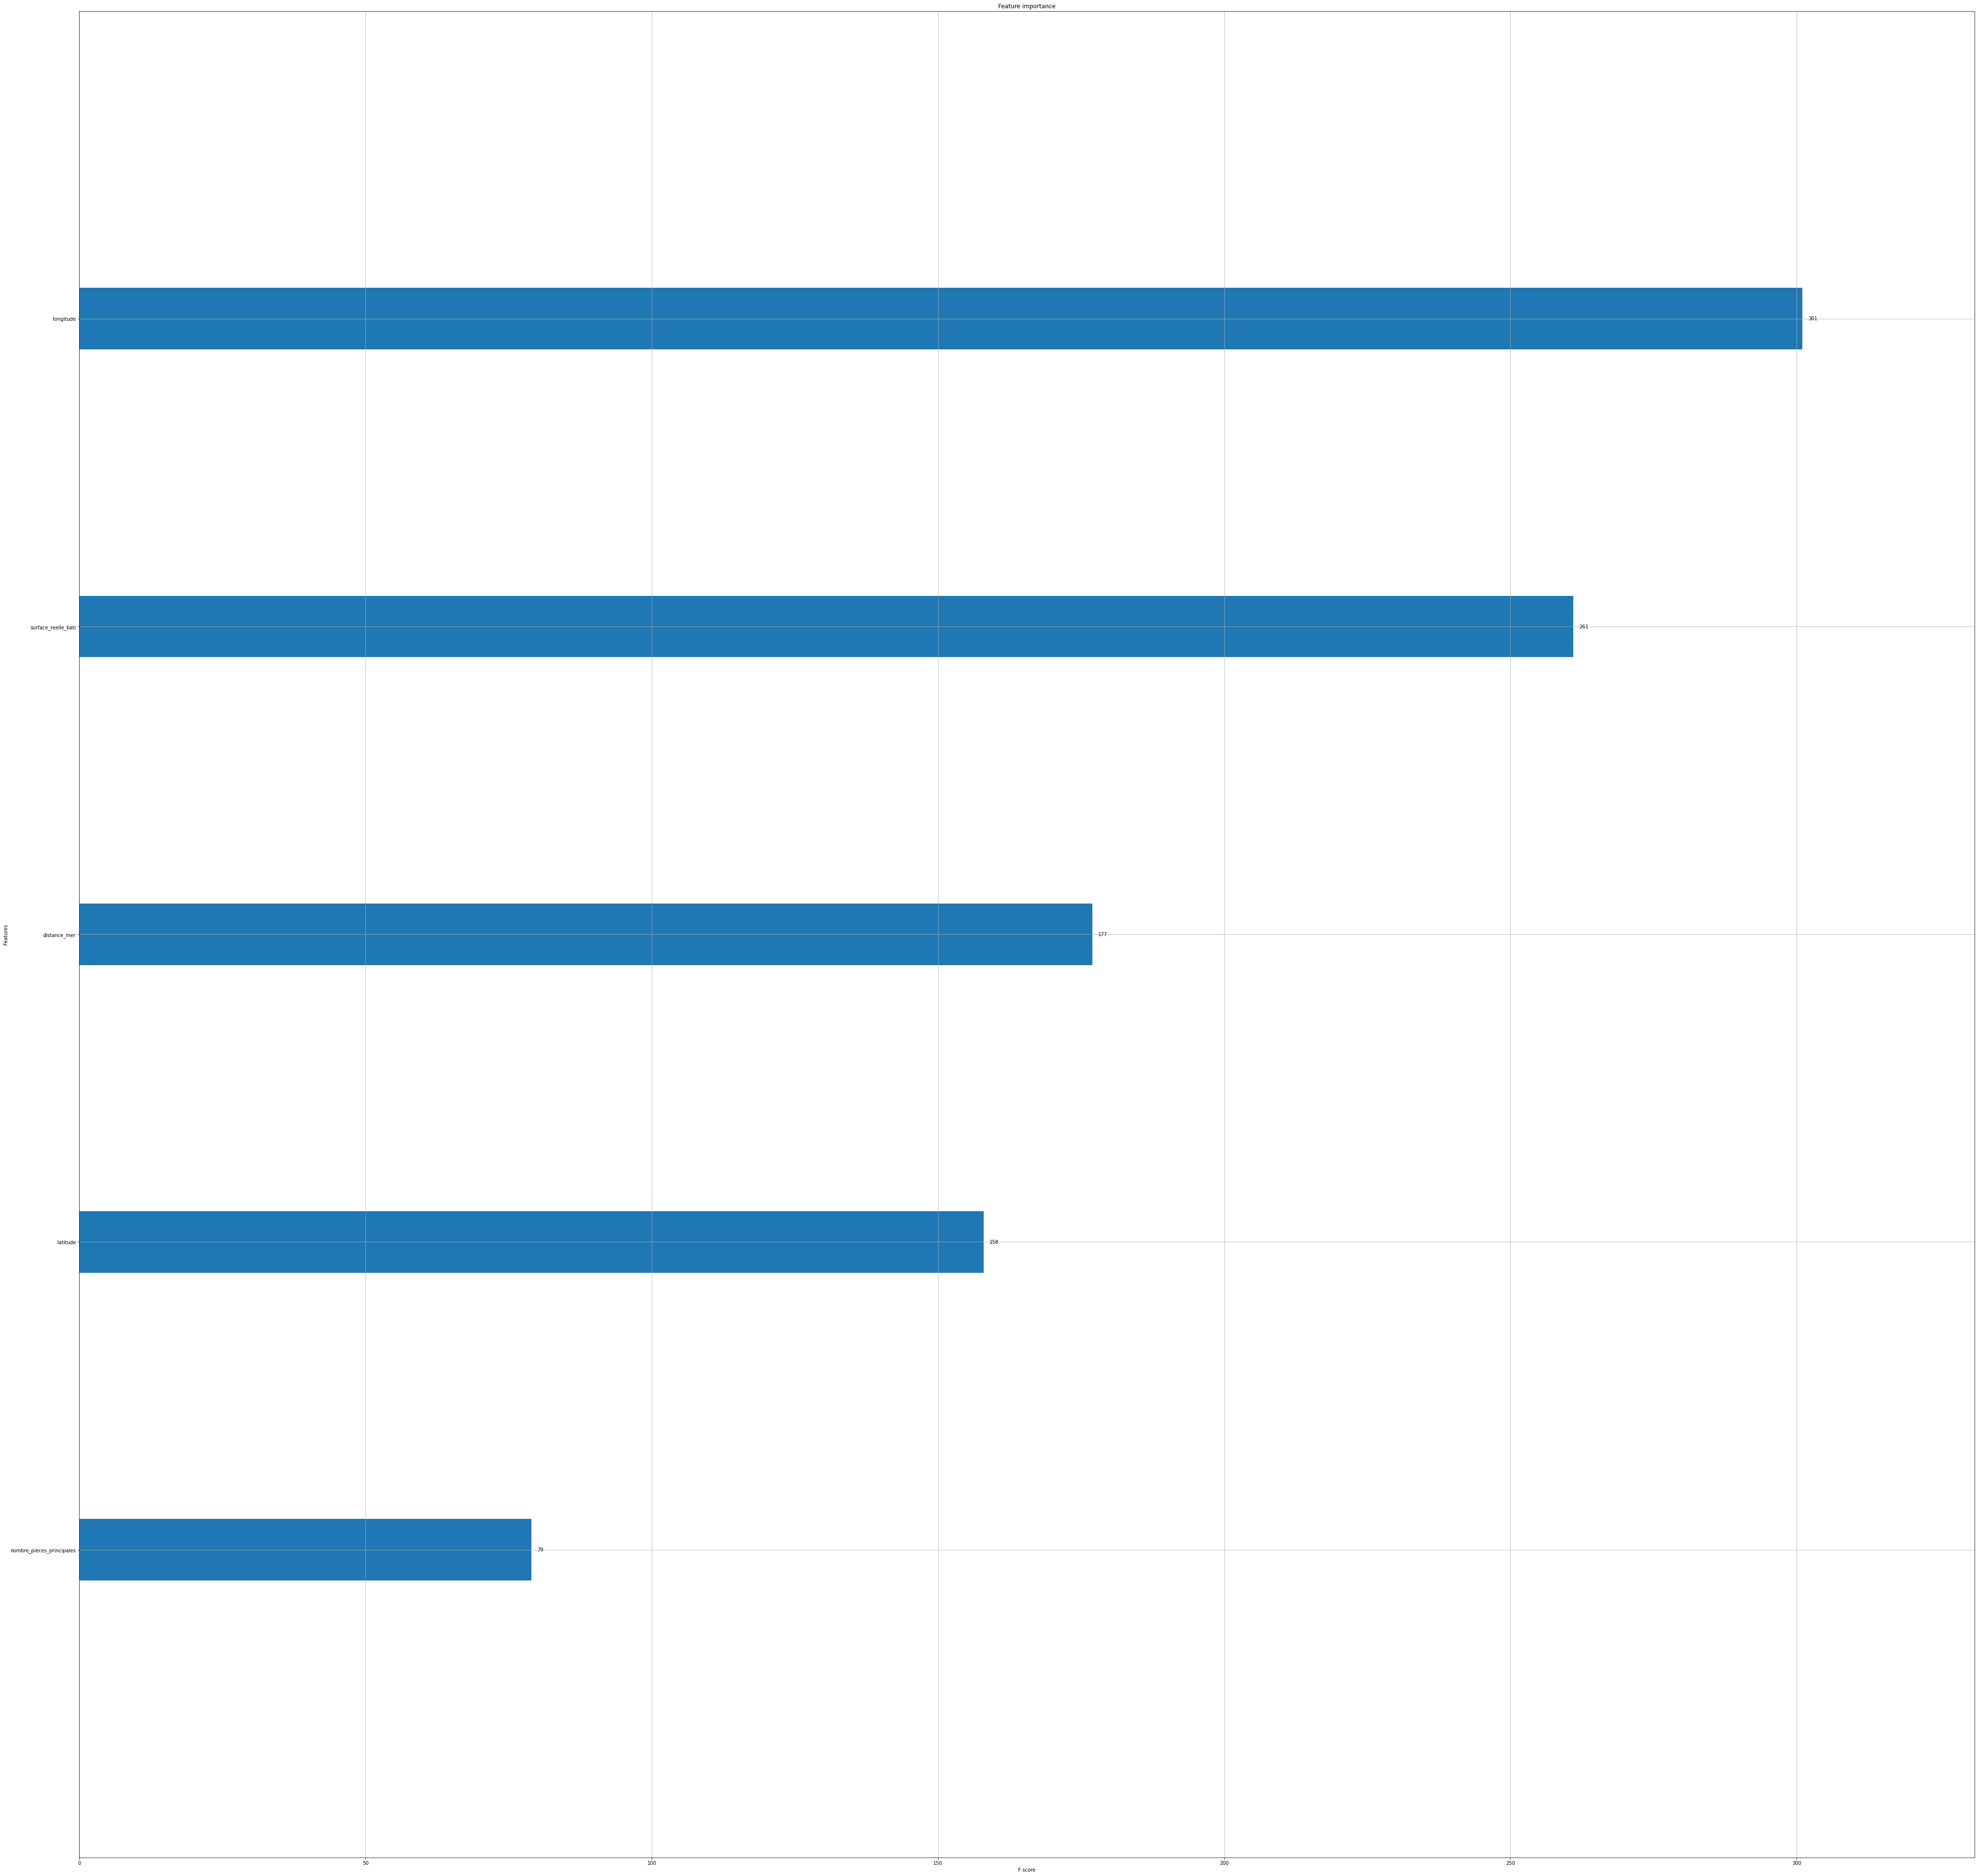

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data1=data.drop(['id_mutation', 'date_mutation'], axis=1)

In [ ]:
X = data1
y = data1['prix'].values
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [ ]:
DM_train = xgb.DMatrix(data = X_train, 
                       label = y_train)
					   
					   
DM_test =  xgb.DMatrix(data = X_test,
                       label = y_test)

In [ ]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20, 25]
}

In [ ]:
gbm = xgb.XGBRegressor()

In [ ]:
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)

In [ ]:
grid_mse.fit(X_train, y_train)

print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[15:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   44.6s finished


[15:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters found:  {'colsample_bytree': 0.9, 'max_depth': 25, 'n_estimators': 200}
Lowest RMSE found:  71298.08588722436


In [ ]:
pred = grid_mse.predict(X_test)

print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

Root mean square error for test dataset: 32900.57


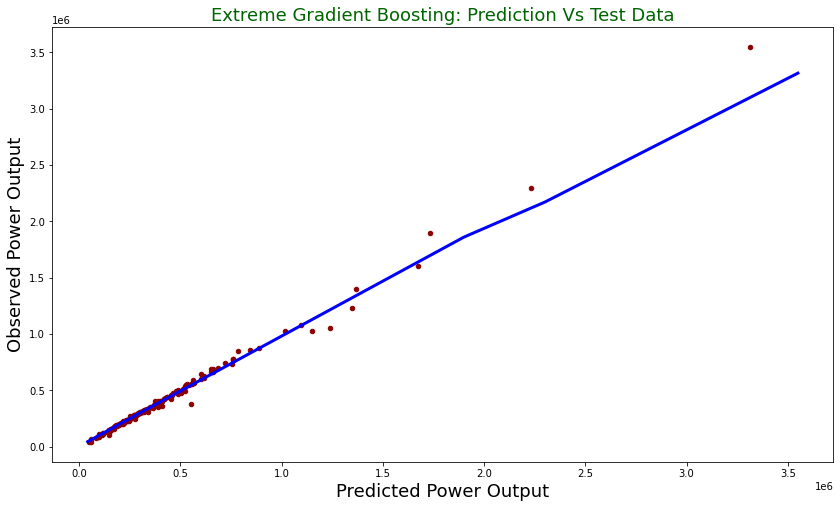

In [ ]:
test = pd.DataFrame({"prediction": pred, "observed": y_test.flatten()})

lowess = sm.nonparametric.lowess

z = lowess(pred.flatten(), y_test.flatten())


test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'darkred')

plt.title("Extreme Gradient Boosting: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")

plt.xlabel("Predicted Power Output", fontsize = 18) 

plt.ylabel("Observed Power Output", fontsize = 18)

plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)

plt.show()